`plot_connectome` Example
---

Use `Nilearn`'s `plot_connectome` function to visualize nodes and edges. Credits to Dr. Pablo Damasceno for the center of mass file:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nilearn import plotting

Load Data
---
Sample data from Dr. Fei Jiang and centers of mass for Desikan-Killiany atlas regions:

In [13]:
# load smaple data
data = np.load('../data/weighU.npy')
print(data.shape)

# center of mass file:
CenterOfMass_DK = np.load('../data/atlases/DK/com_dk.npy', allow_pickle = True)
CenterOfMass_DK = CenterOfMass_DK.ravel()[0]
print('Center of masses for ', len(CenterOfMass_DK), ' parcels')

# Load DK region names:
DK_region_names = pd.read_csv('../data/atlases/DK/dk_names.csv').set_index('Atlas')

(68, 6)
Center of masses for  112  parcels


Match the `data` to each region name, assuming these are the correct label and ordering ...

In [33]:
DK_dict68 = {}
for i, region in enumerate(DK_region_names[:68].index):
    DK_dict68.update({region:data[i,:]})
    
DK_data68 = pd.DataFrame(DK_dict68)
DK_data68

,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
0,0.570486,0.431581,0.480038,0.256106,0.401795,0.397454,0.390066,0.456887,0.436027,0.564624,...,0.378043,0.153892,0.865846,0.622439,0.497202,0.392854,0.521872,0.507798,0.678338,0.550069
1,0.421117,0.501812,0.476384,0.660762,0.631760,0.797184,0.643430,0.493812,0.561874,0.348435,...,0.557672,0.750679,0.129064,0.337373,0.568421,0.590537,0.534694,0.540725,0.506659,0.503095
2,0.503834,0.441948,0.444091,0.183120,0.413447,0.362226,0.427893,0.428704,0.427032,0.517202,...,0.476375,0.264062,0.714513,0.551357,0.422630,0.470132,0.449349,0.507085,0.577126,0.501218
3,0.394558,0.545588,0.568465,0.321197,0.505786,0.487711,0.662645,0.277198,0.522945,0.514901,...,0.674445,0.634532,0.755997,0.532543,0.629530,0.387209,0.571516,0.756488,0.822459,0.727285
4,0.617645,0.307806,0.508677,0.653049,0.578714,0.449678,0.355554,0.527167,0.421382,0.456142,...,0.462940,0.595461,0.305608,0.422217,0.259934,0.453497,0.409225,0.471236,0.210267,0.429309
5,0.532251,0.171933,0.338678,0.018998,0.419488,0.608320,0.398893,0.419976,0.394503,0.369878,...,0.359916,0.058960,0.539042,0.439278,0.294713,0.294564,0.563609,0.542504,0.711828,0.594560


Create array of coordinates for each DK region:

In [37]:
coords = np.array([CenterOfMass_DK[region] for region in DK_region_names[:68].index])
print('Array of coordinates for ', len(coords) , 'regions')

Array of coordinates for  68 regions


### Plotting Nodes:

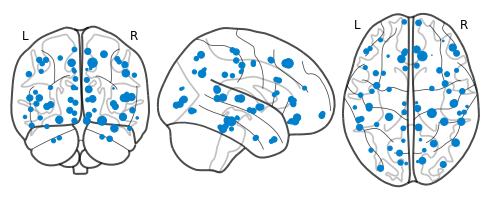

In [55]:
network = np.array([[0]*68]*68) # 68 cortical regions
plotting.plot_connectome(network, coords, node_color = [[0, 0.5, 0.8]]*68, node_size = data[:,0]**2*120)

Edges are inputs as well in the `plot_connectome` function. Need appropriate symmetric matrix with connection strengths (68x68) to plot it.